In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
!head Consumer_Complaints.csv

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,
1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,
1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,
1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,
1388470,Consumer loan,Installment loan,Managing the loan or lease,,MA,01474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,
1388457,Debt collection,Medical,Disclosure verification of debt

In [4]:
complaints = pd.read_csv("Consumer_Complaints.csv", low_memory=False)

In [5]:
complaints.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
3,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,NaN
4,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [6]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395853 entries, 0 to 395852
Data columns (total 14 columns):
Complaint ID            395853 non-null int64
Product                 395853 non-null object
Sub-product             271830 non-null object
Issue                   395847 non-null object
Sub-issue               122938 non-null object
State                   390362 non-null object
ZIP code                391368 non-null float64
Submitted via           395853 non-null object
Date received           395853 non-null object
Date sent to company    395853 non-null object
Company                 395853 non-null object
Company response        395853 non-null object
Timely response?        395853 non-null object
Consumer disputed?      364266 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 45.3+ MB


In [7]:
# complaints['Date received'].resample("M", how=["count"])  # Need to clean up the data first

In [8]:
{column: '' for column in complaints}

{'Company': '',
 'Company response': '',
 'Complaint ID': '',
 'Consumer disputed?': '',
 'Date received': '',
 'Date sent to company': '',
 'Issue': '',
 'Product': '',
 'State': '',
 'Sub-issue': '',
 'Sub-product': '',
 'Submitted via': '',
 'Timely response?': '',
 'ZIP code': ''}

In [9]:
renamed_columns = {'Company': 'company',
                   'Company response': 'response',
                   'Complaint ID': 'id',
                   'Consumer disputed?': 'disputed',
                   'Date received': 'received',
                   'Date sent to company': 'sent',
                   'Issue': 'issue',
                   'Product': 'Product',  # Capital to avoid overwriting product() function on dataframe
                   'State': 'state',
                   'Sub-issue': 'subissue',
                   'Sub-product': 'subproduct',
                   'Submitted via': 'via',
                   'Timely response?': 'timely',
                   'ZIP code': 'zip'}

In [10]:
complaints = complaints.rename(columns=renamed_columns)

In [11]:
complaints.head()

,id,Product,subproduct,issue,subissue,state,zip,via,received,sent,company,response,timely,disputed
0,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
1,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
3,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,05/22/2015,Navy FCU,In progress,Yes,NaN
4,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [12]:
#complaints.index = complaints.pop('id')

In [13]:
#pd.to_datetime(complaints.received)
#complaints['received'] = pd.to_datetime(complaints.pop('received'), format="%m/%d/%Y")

In [14]:
complaints.index = pd.to_datetime(complaints.pop('received'), format="%m/%d/%Y")

In [15]:
complaints.head()

,id,Product,subproduct,issue,subissue,state,zip,via,sent,company,response,timely,disputed
received,,,,,,,,,,,,,
2015-05-22,1388734,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,VA,22204,Web,05/22/2015,"Green Tree Servicing, LLC",Closed with explanation,Yes,NaN
2015-05-22,1389303,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,MO,63304,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1389676,Consumer loan,Vehicle lease,Problems when you are unable to pay,NaN,FL,33414,Web,05/22/2015,Ally Financial Inc.,In progress,Yes,NaN
2015-05-22,1388406,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NC,27615,Web,05/22/2015,Navy FCU,In progress,Yes,NaN
2015-05-22,1388470,Consumer loan,Installment loan,Managing the loan or lease,NaN,MA,1474,Phone,05/22/2015,Santander Bank US,In progress,Yes,NaN


In [16]:
complaints_monthly_count = complaints.id.resample('M', how='count')[:-1]
#complaints.zip.groupby(complaints.index).count().plot()

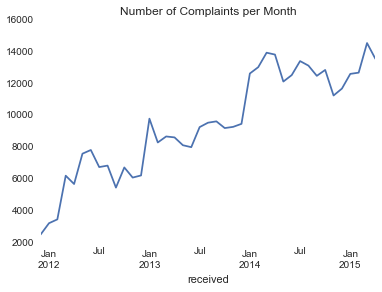

In [17]:
complaints_monthly_count.plot()
plt.title('Number of Complaints per Month')

In [18]:
# complaints.id.groupby(complaints.state).count()

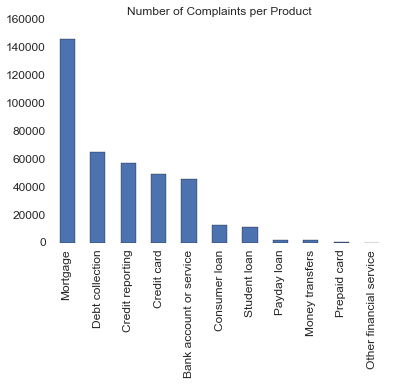

In [19]:
complaints.Product.value_counts().plot(kind='bar', fontsize=12)
plt.title('Number of Complaints per Product')

In [20]:
complaints.Product.value_counts().plot

<bound method Series.plot_series of Mortgage                   146533
Debt collection             65639
Credit reporting            57299
Credit card                 49772
Bank account or service     45851
Consumer loan               13186
Student loan                11873
Payday loan                  2540
Money transfers              2249
Prepaid card                  699
Other financial service       212
dtype: int64>

In [21]:
pd.DataFrame.plot?

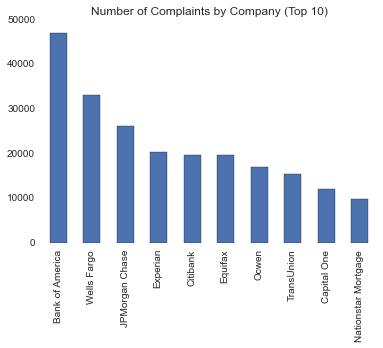

In [22]:
complaints.company.value_counts()[:10].plot(kind='bar')
#plt.ylabel('')
plt.title('Number of Complaints by Company (Top 10)')

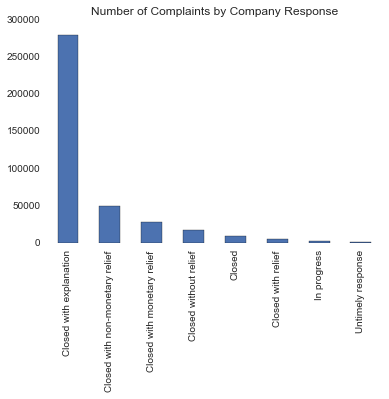

In [23]:
complaints.response.value_counts().plot(kind='bar')
#plt.ylabel('')
plt.title('Number of Complaints by Company Response')

In [30]:
dow = ["Su", "M", "Tu", "W", "Th", "F", "Sa"]
complaints["day_of_week"] = complaints.index.to_series().map(lambda d: d.weekday())

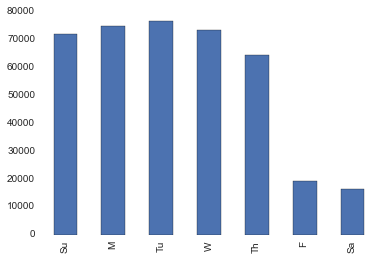

In [35]:
complaints_dow = complaints.day_of_week.value_counts()
complaints_dow = complaints_dow.sort_index()
complaints_dow.index = dow
complaints_dow.plot(kind='bar')